### Do the following exercises based on the session. Use the following link for images: 
https://drive.google.com/drive/folders/1-Lc54S-Vzf0cllAaml6gVMIkEodCckeK?usp=sharing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Affine Transform boy_smiling.jpg by height/4 in the x direction and height/5 in y direction. 

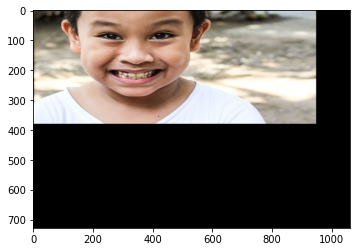

In [22]:
img_bgr = cv2.imread("boy_smiling.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rows, cols, ch = img_rgb.shape
height = rows
  
pts1 = np.float32([[0, 0],
                   [0, cols - 1], 
                   [rows - 1, 0]])
  
pts1 = np.float32([[0 + height / 5, 0 + height / 4],
                   [0 + height / 5, cols - 1 + height / 4], 
                   [rows - 1 + height / 5, 0 + height / 4]])
  
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_rgb, M, (cols + height // 4, rows + height // 5))

plt.imshow(dst)

### Read ariana_aligned.png from the images. Notice that the eyes are horizontal with respect to the screen. Your goal is to Affine Transform the given image such that the image is horizontal with respect to the screen. As shown in the image below. (Hint, manually find eye pixel coordinates and coordinates for the bottom corners of the image. Then use cv2.getTransform2D and cv2.warpAffine)
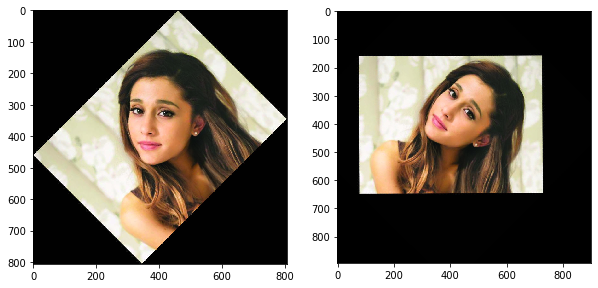

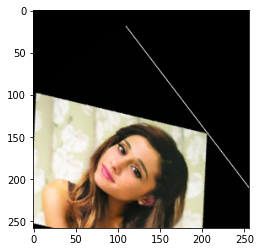

In [40]:
img_bgr = cv2.imread("ariana_aligned.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rows, cols, ch = img_rgb.shape
height = rows

pts1 = np.float32([[250, 107],
                   [147, 0], 
                   [0, 150]])
  
pts2 = np.float32([[250, 0],
                   [100, 0], 
                   [147, 212]])

pts1 = np.float32([[110, 250],
                   [0, 150], 
                   [150, 0]])
  
pts2 = np.float32([[0, 250],
                   [0, 100], 
                   [210, 150]])


M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_rgb, M, (cols, rows))

plt.imshow(dst)

### Apply a homography on coca-cola.jpg and place it on the stadium.jpg such that the placement is perspective-appropriate. (Find corner coordinates for the coco-cola image, and the corners for placement in the stadium image. Then use cv2.findHomography and cv2.warpPerspective.)


error: OpenCV(4.5.2) /tmp/pip-req-build-dccdjyga/opencv/modules/imgproc/src/imgwarp.cpp:2604: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 2 && M0.cols == 3 in function 'warpAffine'


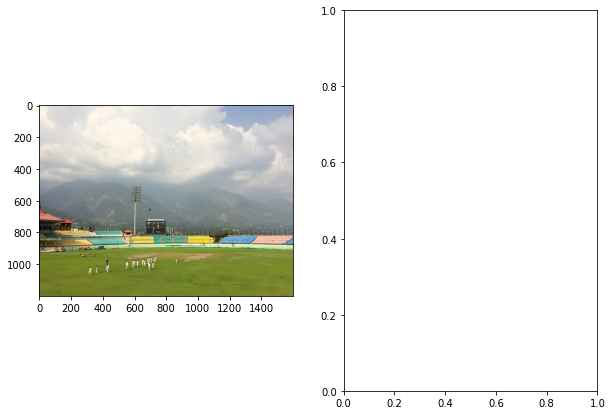

In [56]:
img_bgr = cv2.imread("stadium.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

ad_bgr = cv2.imread("coca-cola.jpg")
ad_rgb = cv2.cvtColor(ad_bgr, cv2.COLOR_BGR2RGB)

points1 = np.float32([[0, 0],
                     [0, 300],
                     [810, 0],
                     [810, 300]])
points2 = np.float32([[900, 1000],
                     [800, 1100],
                     [1200,1100],
                     [1000, 1200]])

h, status = cv2.findHomography(points1, points2)

fig = plt.figure(figsize=(10, 7))
rows, cols = 1, 2
fig.add_subplot(rows, cols, 1)
plt.imshow(img_rgb)
fig.add_subplot(rows, cols, 2)
plt.imshow(cv2.warpAffine(ad_rgb, h, (1000, 1000)))

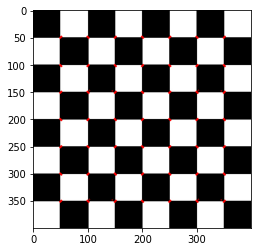

In [127]:
filename = 'chess1.jpg'
img = cv2.imread(filename)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

# Threshold for an optimal value, it may vary depending on the image.
#img[dst>0.01*dst.max()]=[0,0,255]
dots = np.zeros([dst.shape[0], dst.shape[1], 3], dtype=int)
threshold =  10
tmp = np.int32(dst >= threshold)
tmp *= 255
dots[:,:, 0] += tmp
#image = cv2.circle(image, center_coordinates, radius, color, thickness)
final_img = rgb
for i in range(rgb.shape[0]):
    for j in range(rgb.shape[1]):
        if dots[i][j][0]:
            final_img = cv2.circle(final_img, (i, j), 1, (255, 0, 0), 1)
plt.imshow((final_img).clip(0, 255))

In [131]:
img = cv2.imread('box.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
sift_image = cv2.drawKeypoints(gray, keypoints, img)

plt.imshow(sift_image)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [136]:
!pip uninstall opencv-python opencv-contrib-python
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

Found existing installation: opencv-python 4.5.2.52
Uninstalling opencv-python-4.5.2.52:
  Would remove:
    /home/rahulgoel/.local/lib/python3.9/site-packages/cv2/*
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python-4.5.2.52.dist-info/*
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5Concurrent-21c64331.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5Core-d92f2856.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5Gui-ca084835.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5Test-9d4ee57e.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5Widgets-0e1d98b5.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libQt5XcbQpa-70670cdb.so.5.15.0
    /home/rahulgoel/.local/lib/python3.9/site-packages/opencv_python.libs/libX11-xcb-1ae4fd0e.so.1.0.0
    /ho